# Credit Card Fraud Detection

A credit card is a small thin plastic or fiber card that incorporates information about the person such as a picture or signature and the person named on it to charge purchases and services to his linked account charges which will be debited regularly.  
Nowadays, card data is read by ATMs, swiping machines, store readers, banks, and online transactions. 
Each card has a unique card number which is very important, its security mainly relies on the physical security of the card and also the privacy of the credit card number. 
There is a rapid growth in credit card transactions which has led to substantial growth in scam cases. 
Credit card fraud is expanding heavily because fraud financial loss is increasing drastically. 
Multiple data mining and statistical techniques are used to catch fraud. 
Therefore the detection of fraud using efficient and secured methods are very important.

Tasks To Be Performed:

Load the dataset using the pandas module.
Perform missing value analysis on the dataset.
From the dataset, calculate the number of genuine transactions, number of fraud transactions and the percentage of fraud transactions.
Using the visualization module, visualize the genuine and fraudulent transactions using a bar graph.
Using the Standard Scaler module, normalize the amount column and store the new values in the NormalizedAmount column.
Split the dataset in train and test set and have a 70:30 split ratio for the model.
Now use a decision tree and random forest model for training on top of the train set.
Compare the predictions of both models using predict().
Compare the accuracy of both models using score().
Check the performance matrix of both models and compare which model is having the highest performance.



In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
from collections import Counter
import itertools
# Load the csv file
dataframe = pd.read_csv("creditcard.csv")
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
#dataframe.isnull().values.any()
dataframe.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [11]:
dataframe.dropna(axis=0, inplace=True)

In [12]:
dataframe.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
dataframe["Amount"].describe()

count    20000.000000
mean        99.940908
std        263.755957
min          0.000000
25%          7.250000
50%         28.700000
75%         89.912500
max      11898.090000
Name: Amount, dtype: float64

In [13]:
non_fraud = len(dataframe[dataframe.Class == 0])
fraud = len(dataframe[dataframe.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100
print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  11615
Number of Fraud transactions:  49
Percentage of Fraud transactions: 0.4201


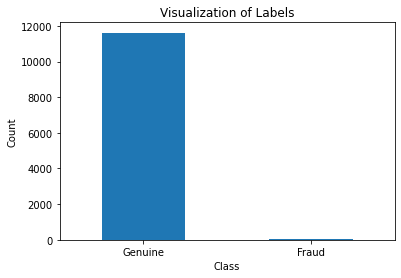

In [14]:
import matplotlib.pyplot as plt
labels = ["Genuine", "Fraud"]
count_classes = dataframe.value_counts(dataframe['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [15]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataframe["NormalizedAmount"] = scaler.fit_transform(dataframe["Amount"].values.reshape(-1, 1))
dataframe.drop(["Amount", "Time"], inplace= True, axis= 1)
Y = dataframe["Class"]
X = dataframe.drop(["Class"], axis= 1)

In [16]:
from sklearn.model_selection import train_test_split
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)
print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)


Shape of train_X:  (8164, 29)
Shape of test_X:  (3500, 29)


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#Decision Tree
decision_tree = DecisionTreeClassifier()
# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)

In [18]:
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100
random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100
print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)

Random Forest Score:  99.91428571428571
Decision Tree Score:  99.91428571428571


In [19]:
predictions_dt[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [20]:
predictions_rf[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [21]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [22]:
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)


Confusion Matrix - Decision Tree
[[3483    1]
 [   2   14]]


In [23]:
metrics(test_Y, predictions_dt)

Accuracy: 0.99914
Precision: 0.93333
Recall: 0.87500
F1-score: 0.90323
